# EJERCICIOS

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, BatchNormalization,Normalization

In [3]:
# Verifica si TensorFlow detecta la GPU
if tf.config.list_physical_devices('GPU'):
    print("¡GPU encontrada!")
else:
    print("¡GPU no encontrada!")

¡GPU encontrada!


In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## EJERCICIO 1

¿Cuántas neuronas hacen falta en la capa de salida para clasificar emails entre correo no deseado y correo deseado? 

¿Qué función de activación deberías usar en la capa de salida? 

Si, en cambio, quieres enfrentarte a MNIST, ¿cuántas neuronas necesitas en la capa de salida y qué función de activación deberías usar? 

¿Y si quieres que la red prediga los precios de la vivienda en California?

- 1, es clasificación binaria.
- Depende.
    - En clasificación binaria se suele usar la fución de activación sigmoide.
    - En clasificación muticlase se suele usar la función de activación softmax.
    - En regrsión no se suele usar ninguna función de activación en específica.
- 10 neuronas de salida (una por numero escrito a mano 0-9) con función softmax. 
- Ninguna, no queremos que la neurona transforme el valor de salida.

## EJERCICIO 2

Entrena un red neuronal profunda con el conjunto de datos MNIST (puedes cargarlo con tf. keras. datasets.minst.load_data()). Intenta conseguir la mejor pruebas en el conjunto de validación  ajustando los hiperparámetros de modo manual. Prueba a buscar una buena tasa de aprendizaje y utiliza la detención temprana (mínimo hay que conseguir un 97%).

Pasos a seguir: 
+ Entrena varios modelos con distintas tasas de aprendizaje
+ Guarda cada modelo en un fichero
+ Carga cada modelo y evalúalo en el conjunto de cargas y quedate con programación con el mejor (bucle que se quede con el mejor), mostrando la tasa de aprendizaje y la exactitud del mejor modelo.

Si no obtienes más de un 97% vuelve a empezar.

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalización de las imágenes (opcional pero recomendado)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# División del conjunto de entrenamiento en train y validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=17)

# Imprimir tamaños de los conjuntos
print(f"Conjunto de entrenamiento: {x_train.shape}")
print(f"Conjunto de validación: {x_val.shape}")
print(f"Conjunto de prueba: {x_test.shape}")

Conjunto de entrenamiento: (48000, 28, 28)
Conjunto de validación: (12000, 28, 28)
Conjunto de prueba: (10000, 28, 28)


In [27]:
learning_rates=[7e-4,1e-3,5e-3]
modelos=[]
histories=[]

tf.keras.backend.clear_session()
tf.random.set_seed(17)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

i=0
for idx, lr in enumerate(learning_rates,start=1):
    
    model = Sequential(
        [
            Input(shape=(28, 28)),
            Flatten(),
            Dense(126, activation="relu"),
            Dense(42, activation="relu"),
            Dense(10, activation="softmax"),
        ]
)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rates[i])
    

    i+=1
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
    
    

    # models.append(model)
    print("Learning rate:", model.optimizer.learning_rate.numpy())
    history=model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

    print(f"\nResultados finales del modelo {idx}:")
    print("Learning rate:", model.optimizer.learning_rate.numpy())
    print(f"Última pérdida: {history.history['loss'][-1]}")
    print(f"Última precisión en entrenamiento: {history.history['accuracy'][-1]}")
    print(f"Última pérdida en validación: {history.history['val_loss'][-1]}")
    print(f"Última precisión en validación: {history.history['val_accuracy'][-1]}")

    path=f"resultados4_3/my_keras_model_{idx}.keras"
    print(path)
    model.save(path)
    modelos.append(tf.keras.models.load_model(path))

print(modelos)

Learning rate: 0.0007
Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8493 - loss: 0.5411 - val_accuracy: 0.9514 - val_loss: 0.1771
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.9558 - loss: 0.1498 - val_accuracy: 0.9632 - val_loss: 0.1336
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.9694 - loss: 0.1031 - val_accuracy: 0.9672 - val_loss: 0.1160
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.9776 - loss: 0.0772 - val_accuracy: 0.9696 - val_loss: 0.1087
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.9833 - loss: 0.0592 - val_accuracy: 0.9697 - val_loss: 0.1080
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.9877 - loss: 0.0448 - val_accuracy: 0.9695 - val_loss: 0.1122
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.9902 - loss: 0.0344 - val_accuracy: 0.9704 - val_loss: 0.1127
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step 

In [7]:
mejor_precision = 0
mejor_modelo = None
mejor_resultado = None

for modelo in modelos:
    test_loss, test_accuracy = modelo.evaluate(x_test, y_test)
    
    if test_accuracy > mejor_precision:
        mejor_precision = test_accuracy
        mejor_modelo = modelo
        mejor_resultado = (test_loss, test_accuracy)

# Mostrar los resultados del mejor modelo
if mejor_modelo:
    print("\nMejor Modelo:")
    print("Learning rate:", modelos[idx-1].optimizer.learning_rate.numpy())
    print("Pérdida:", mejor_resultado[0], "Precisión:", mejor_resultado[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.1075
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9547 - loss: 0.1499
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9514 - loss: 0.1695

Mejor Modelo:
Learning rate: 0.005
Pérdida: 0.09306757897138596 Precisión: 0.973800003528595


## EJERCICIO 3

Clasificación de Imágenes de Dígitos Escritos a Mano:

* Objetivo: Entrenar una red neuronal para clasificar imágenes de dígitos escritos a mano utilizando el conjunto de datos SVHN (Street View House Numbers).

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos representando alguna imagen con su etiqueta y muestra los valores (únicos) de y (en el entrenamiento, en validación y en pruebas), preparar los datos (d normalizar dividiendo entre 255.0 e igual hay que hacer algo más), construir, compilar y entrenar una red neuronal. 

    * Utilizar detección temprana

    * Hacer una gráfica de como evoluciona accuracy y val_accuracy durante el entrenamiento

    * Si es necesario ajustar el modelo para lograr una mayor precisión.

    * Evalúar el modelo en el conjunto de test y hacer alguna predicción (representa alguna imagen con su etiqueta real y la predicha)

In [32]:
def load_svhn_data(url):
    path = tf.keras.utils.get_file("svhn.mat", url)
    data = loadmat(path)
    return np.transpose(data["X"], (3, 0, 1, 2)), data["y"].flatten()

# Cargar datos
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"



x_train_full, y_train_full = load_svhn_data(train_url)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)
x_test, y_test = load_svhn_data(test_url)

In [33]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

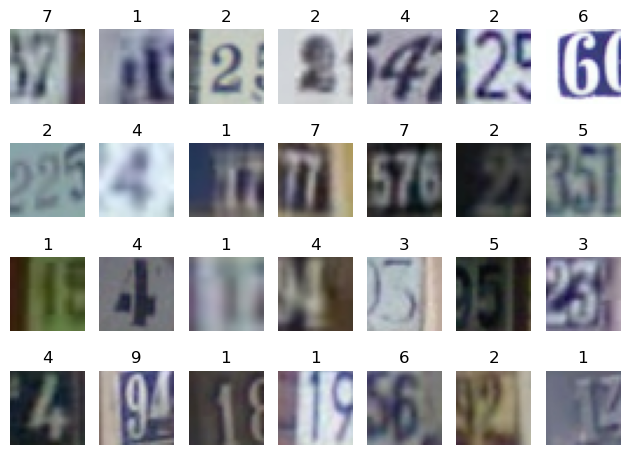

In [10]:
i=0

for x in x_train:
    plt.subplot(4,7,i+1)
    plt.title(y_train[i])
    plt.imshow(x)
    plt.axis('off')
   
    if i == 27:
        break
    i+=1
plt.tight_layout()
plt.show()

In [11]:
values , count= np.unique(y_train,return_counts=True)
for y, cant in zip (values,count):
    print(y,'-->',cant)

1 --> 11015
2 --> 8452
3 --> 6807
4 --> 6018
5 --> 5505
6 --> 4574
7 --> 4472
8 --> 4031
9 --> 3742
10 --> 3989


In [18]:
values , count= np.unique(y_val,return_counts=True)
for y, cant in zip (values,count):
    print(y,'-->',cant)

1 --> 2846
2 --> 2133
3 --> 1690
4 --> 1440
5 --> 1377
6 --> 1153
7 --> 1123
8 --> 1014
9 --> 917
10 --> 959


In [19]:
values , count= np.unique(y_test,return_counts=True)
for y, cant in zip (values,count):
    print(y,'-->',cant)

1 --> 13861
2 --> 10585
3 --> 8497
4 --> 7458
5 --> 6882
6 --> 5727
7 --> 5595
8 --> 5045
9 --> 4659
10 --> 4948


In [34]:
# 10 no es un digito (son 2), hay que sustituirlo por 0
y_train=np.where(y_train==10, 0, y_train)
y_val=np.where(y_val==10, 0, y_val)
y_test=np.where(y_test==10, 0, y_test)

In [35]:
values , count= np.unique(y_train,return_counts=True)
for y, cant in zip (values,count):
    print(y,'-->',cant)

0 --> 3989
1 --> 11015
2 --> 8452
3 --> 6807
4 --> 6018
5 --> 5505
6 --> 4574
7 --> 4472
8 --> 4031
9 --> 3742


In [22]:
print(x_train[0].shape)

(32, 32, 3)


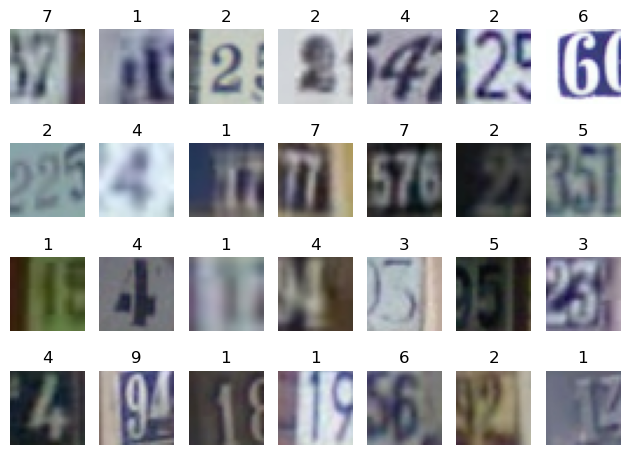

In [14]:
i=0

for x in x_train:
    plt.subplot(4,7,i+1)
    plt.title(y_train[i])
    plt.imshow(x)
    plt.axis('off')
   
    if i == 27:
        break
    i+=1
plt.tight_layout()
plt.show()

In [36]:
learning_rates=[1e-4,7e-4,1e-3,5e-3]
models=[]
histories=[]

tf.keras.backend.clear_session()
tf.random.set_seed(17)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

i=0
for lr in learning_rates:
    
    model = Sequential(
        [
            Input(shape=(32, 32,3)),
            Flatten(),
            Dense(256, activation="relu"),
            Dense(64, activation="relu"),
            Dense(64, activation="relu"),
            Dense(10, activation="softmax"),
        ]
)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rates[i])
    

    i+=1
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
    
    

    models.append(model)


In [37]:
for model in models:
    print("Learning rate:", model.optimizer.learning_rate.numpy())
    histories.append(model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val),callbacks=early_stopping_cb))

Learning rate: 1e-04
Epoch 1/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1961 - loss: 2.2171 - val_accuracy: 0.3597 - val_loss: 1.9021
Epoch 2/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.4177 - loss: 1.7289 - val_accuracy: 0.4913 - val_loss: 1.5465
Epoch 3/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.5303 - loss: 1.4365 - val_accuracy: 0.5554 - val_loss: 1.3868
Epoch 4/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.5889 - loss: 1.3004 - val_accuracy: 0.6076 - val_loss: 1.2644
Epoch 5/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.6301 - loss: 1.2014 - val_accuracy: 0.6371 - val_loss: 1.1829
Epoch 6/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.6580 - loss: 1.1287 - val_accuracy: 0.6554 - val_loss: 1.1256
Epoch 7/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.6769 - loss: 1.0762 - val_accuracy: 0.6676 - val_loss: 1.0861
Epoch 8/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step -


Modelo 1:
Learning rate: 1e-04
Pérdida de Entrenamiento: 0.6965097784996033
Precisión de Etrenamiento: 0.7892159223556519
Pérdida de Validación: 0.7513218522071838
Precisión de Validación: 0.7748430371284485


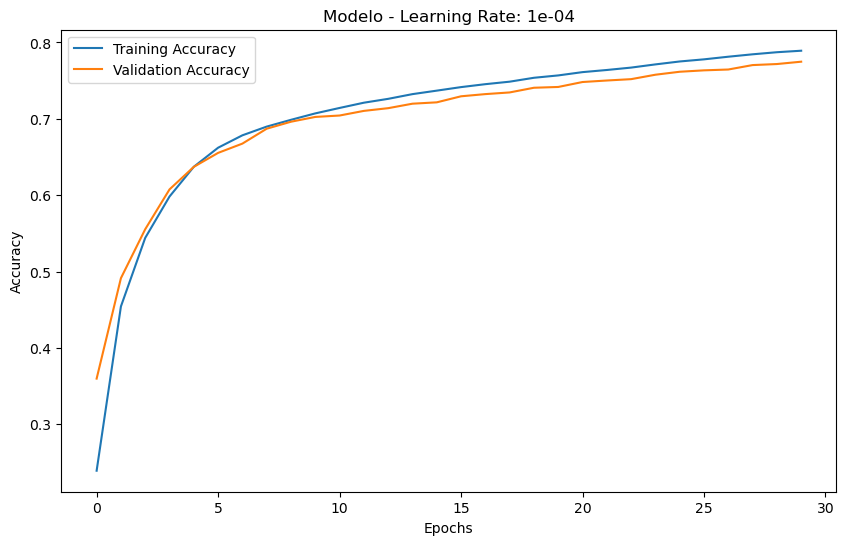


Modelo 2:
Learning rate: 0.0007
Pérdida de Entrenamiento: 1.0000971555709839
Precisión de Etrenamiento: 0.6876034736633301
Pérdida de Validación: 1.0391790866851807
Precisión de Validación: 0.6727409362792969


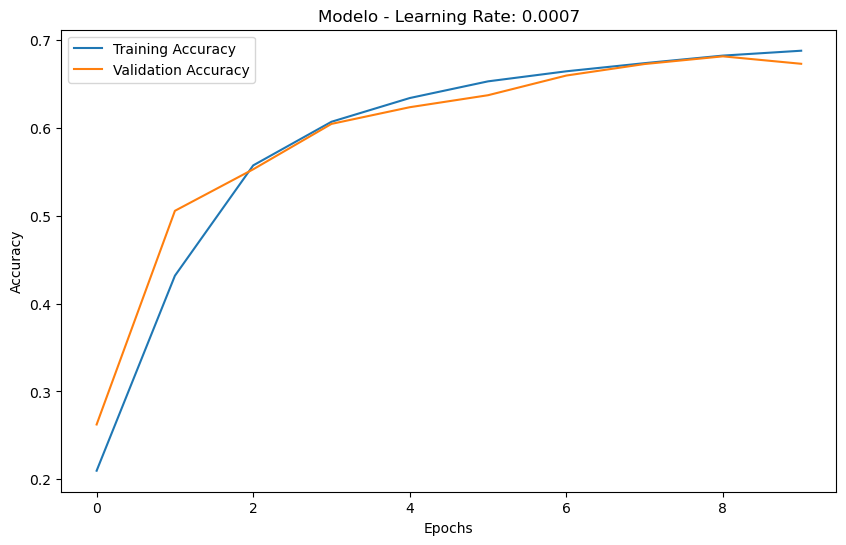


Modelo 3:
Learning rate: 0.001
Pérdida de Entrenamiento: 1.535650372505188
Precisión de Etrenamiento: 0.46980634331703186
Pérdida de Validación: 1.554093599319458
Precisión de Validación: 0.4629402160644531


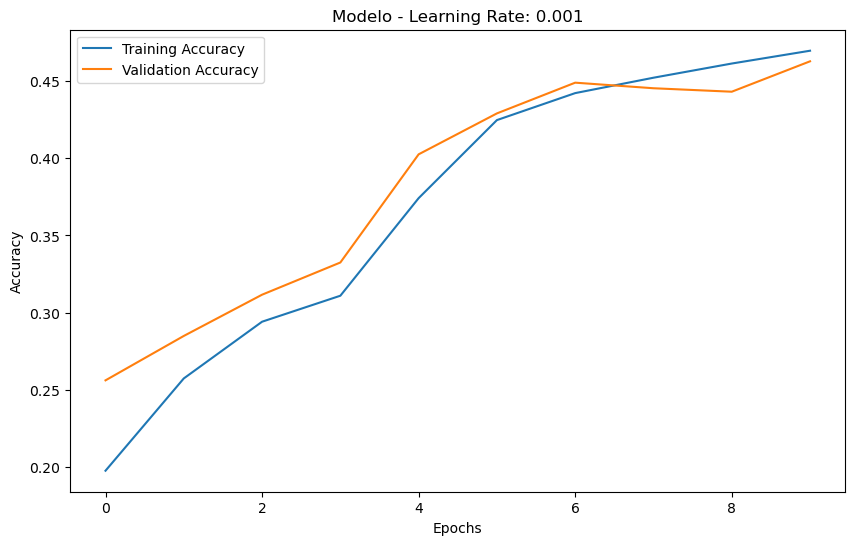


Modelo 4:
Learning rate: 0.005
Pérdida de Entrenamiento: 2.2382442951202393
Precisión de Etrenamiento: 0.18795324862003326
Pérdida de Validación: 2.2323129177093506
Precisión de Validación: 0.19423969089984894


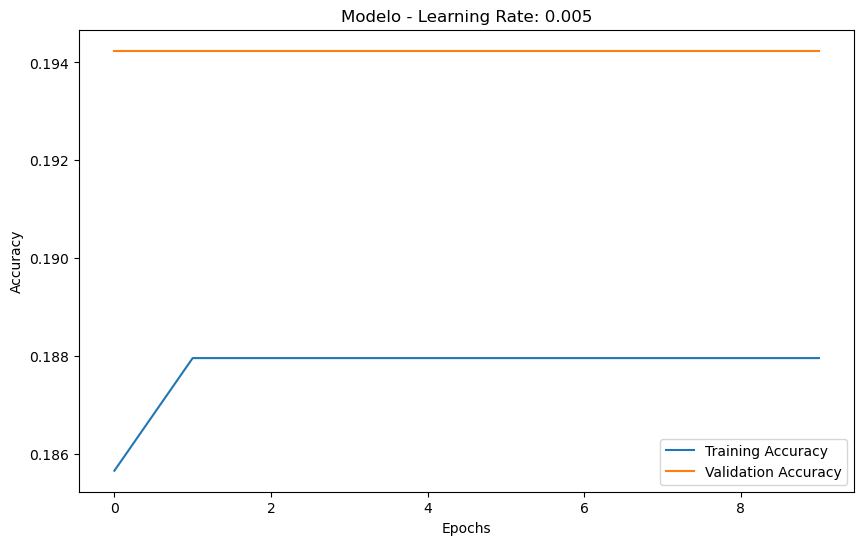

In [38]:
mejor_precision = 0
mejor_modelo = None
mejor_lr = None
mejor_resultado = None


for idx, history in enumerate(histories, start=1):
    train_loss = history.history['loss'][-1]
    train_accuracy = history.history['accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    val_accuracy= history.history['val_accuracy'][-1]

    print(f"\nModelo {idx}:")
    print("Learning rate:", models[idx-1].optimizer.learning_rate.numpy())
    print("Pérdida de Entrenamiento:", train_loss)
    print("Precisión de Etrenamiento:", train_accuracy)
    print("Pérdida de Validación:", val_loss)
    print("Precisión de Validación:", val_accuracy)
    
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Modelo - Learning Rate: {str(models[idx-1].optimizer.learning_rate.numpy())}')
    plt.legend()
    plt.show()



    
    
    if train_accuracy > mejor_precision:
        mejor_precision = train_accuracy
        mejor_lr = models[idx-1].optimizer.learning_rate.numpy()
        mejor_resultado = (train_loss, train_accuracy)
        mejor_historial = history  # Guardar historial del mejor modelo
        mejor_modelo = models[idx-1]




Mejor Modelo:
Learning rate: 1e-04


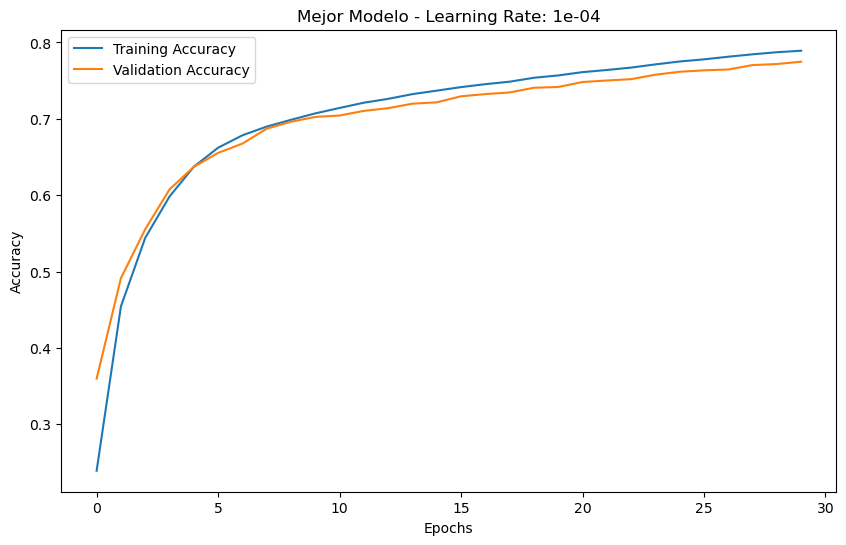

In [39]:
if mejor_historial:
    print("\nMejor Modelo:")
    print("Learning rate:", mejor_lr)
   
    # Graficar el mejor modelo
    plt.figure(figsize=(10, 6))
    plt.plot(mejor_historial.history['accuracy'], label='Training Accuracy')
    plt.plot(mejor_historial.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Mejor Modelo - Learning Rate: {str(mejor_lr)}')
    plt.legend()
    plt.show()
else:
    print("No se encontró ningún modelo con mejor precisión.")

In [40]:
test_loss, test_accuracy = mejor_modelo.evaluate(x_test, y_test)
print("Pérdida:", test_loss, "Precisión:", test_accuracy)

2290/2290 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.7929 - loss: 0.6939
Pérdida: 0.6985489726066589 Precisión: 0.790641188621521


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


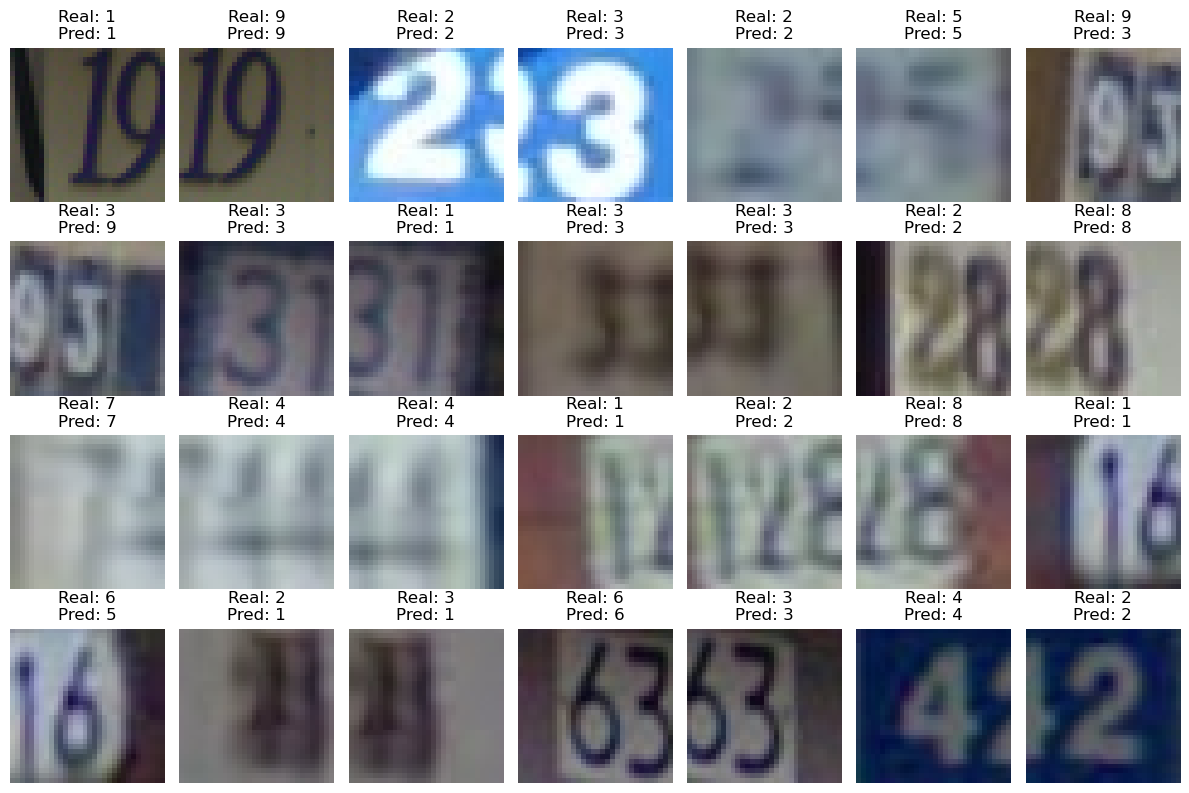

In [38]:
num_imagenes = 28

# Realizar predicciones con el mejor modelo
predicciones = mejor_modelo.predict(x_test[:num_imagenes])
etiquetas_predichas = np.argmax(predicciones, axis=1)  # Convertir a etiquetas categóricas

# Mostrar imágenes junto con la etiqueta real y la predicción
plt.figure(figsize=(12, 8))
for i in range(num_imagenes):
    plt.subplot(4, 7, i + 1)
    plt.imshow(x_test[i].reshape(32,32,3), cmap='gray')  # Ajusta la forma según tu dataset
    plt.title(f"Real: {y_test[i]}\nPred: {etiquetas_predichas[i]}")
    plt.axis('off')
    

plt.tight_layout()
plt.show()

## EJERCICIO 4

Predicción del consumo de energía:

* Objetivo: Construir una red neuronal para predecir el consumo de energía de edificios a partir de características como la temperatura, humedad, y tiempo del conjunto de datos Energy Efficiency de UCI Machine Learning Repository

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos, preparar los datos (normalizar con una capa de normalización), construir un modelo de regresión, compilar y entrenar una red neuronal. 
    
    * Usa X1-X8 para la X e Y1-Y2 para la y

    * Ajusta el modelo hasta encontrar un error absoluto medio aceptable

    * Haz una gráfica de como evoluciona el error absoluto medio y error absoluto medio del conjunto de validación durante el entrenamiento

    * Evalúa el modelo en el conjunto de test y haz alguna predicción (muestra el valor predicho y el real)

In [26]:
# Descargar el conjunto de datos de eficiencia energética de UCI
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data = pd.read_excel(url)

In [51]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [42]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [43]:
data["X7"].value_counts()

X7
0.10    240
0.25    240
0.40    240
0.00     48
Name: count, dtype: int64

In [44]:
corr_matrix = data.corr(numeric_only=True).abs()
corr_matrix.style.background_gradient()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,0.991901,0.203782,0.868823,0.827747,0.000000,0.000000,0.000000,0.622272,0.634339
X2,0.991901,1.000000,0.195502,0.880720,0.858148,0.000000,0.000000,0.000000,0.658120,0.672999
X3,0.203782,0.195502,1.000000,0.292316,0.280976,0.000000,0.000000,0.000000,0.455671,0.427117
X4,0.868823,0.880720,0.292316,1.000000,0.972512,0.000000,0.000000,0.000000,0.861828,0.862547
X5,0.827747,0.858148,0.280976,0.972512,1.000000,0.000000,0.000000,0.000000,0.889430,0.895785
X6,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002587,0.014290
X7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.212964,0.269842,0.207505
X8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212964,1.000000,0.087368,0.050525
Y1,0.622272,0.658120,0.455671,0.861828,0.889430,0.002587,0.269842,0.087368,1.000000,0.975862
Y2,0.634339,0.672999,0.427117,0.862547,0.895785,0.014290,0.207505,0.050525,0.975862,1.000000


In [27]:
y_full = data[['Y1','Y2']].copy()
x_full = data.drop(['Y1','Y2'],axis=1)
x_train_full, x_test, y_train_full, y_test = train_test_split(x_full, y_full, test_size=0.2, random_state=17)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=17)


In [ ]:
learning_rates = [1e-4, 7e-4, 1e-3, 5e-3]
models = []
histories = []


tf.keras.backend.clear_session()
tf.random.set_seed(17)

norm_layer = tf.keras.layers.Normalization()

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

i = 0
for lr in learning_rates:
    # Definir el modelo
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(8,)),  # Capa de entrada correcta
        norm_layer,  # Normalization aquí, no antes
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(2)  # Cambiado a 2 neuronas para clasificación binaria
    ])
    
    # Asegúrate de adaptar la normalización a x_train DESPUÉS de definir el modelo
    
   
    
    # Definir el optimizador con la tasa de aprendizaje actual
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss="mean_absolute_error",
                  optimizer=optimizer,
                  metrics=["mean_absolute_error"])
    
    # Por motivos que escapan a mi comprensión (y a la de chatGPT) si descomentamos esto peta
    #norm_layer.adapt(x_train)


    models.append(model)





In [33]:
for model in models:
    print("Learning rate:", model.optimizer.learning_rate.numpy())
    histories.append(model.fit(x_train, y_train, epochs=75, validation_data=(x_val, y_val),callbacks=early_stopping_cb))

Learning rate: 1e-04
Epoch 1/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 29.4702 - mean_absolute_error: 29.4702 - val_loss: 13.2895 - val_mean_absolute_error: 13.2895
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4980 - mean_absolute_error: 12.4980 - val_loss: 8.9000 - val_mean_absolute_error: 8.9000
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8077 - mean_absolute_error: 8.8077 - val_loss: 7.8541 - val_mean_absolute_error: 7.8541
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9184 - mean_absolute_error: 7.9184 - val_loss: 7.3236 - val_mean_absolute_error: 7.3236
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4286 - mean_absolute_error: 7.4286 - val_loss: 6.9539 - val_mean_absolute_error: 6.9539
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1200 - mean_absolute_error: 7.1200 - val_loss: 6.7192 - val_mean_absolute_error: 6.7192
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9116 - mean_absolute_err


Modelo 1:
Learning rate: 1e-04
Pérdida de Entrenamiento: 2.9338760375976562
Error de Etrenamiento: 2.9338760375976562
Pérdida de Validación: 2.8478639125823975
Error de Validación: 2.8478639125823975


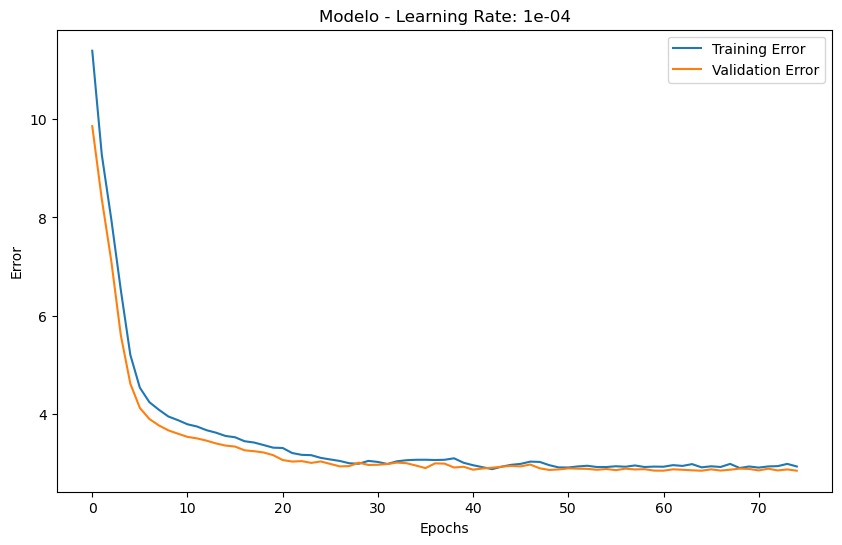


Modelo 2:
Learning rate: 0.0007
Pérdida de Entrenamiento: 3.562065362930298
Error de Etrenamiento: 3.562065362930298
Pérdida de Validación: 3.592517375946045
Error de Validación: 3.592517375946045


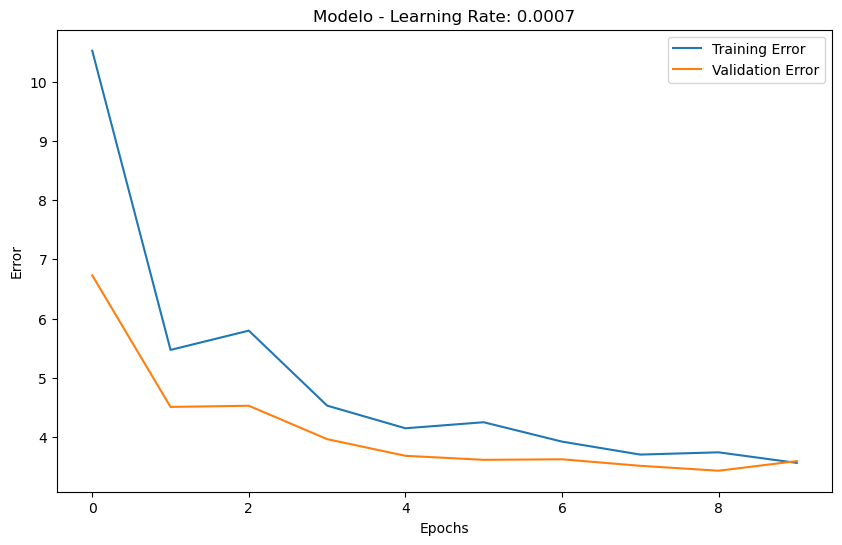


Modelo 3:
Learning rate: 0.001
Pérdida de Entrenamiento: 3.594299077987671
Error de Etrenamiento: 3.594299077987671
Pérdida de Validación: 3.18652606010437
Error de Validación: 3.18652606010437


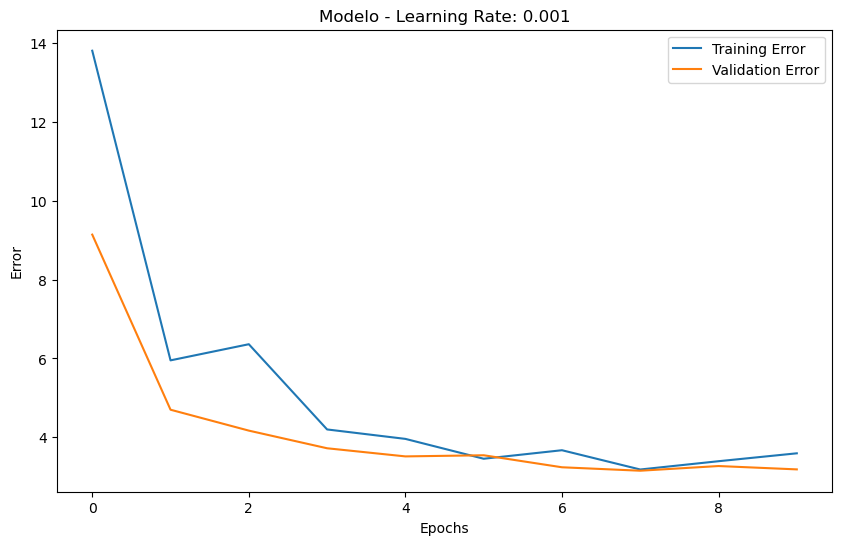


Modelo 4:
Learning rate: 0.005
Pérdida de Entrenamiento: 4.181612491607666
Error de Etrenamiento: 4.181612491607666
Pérdida de Validación: 4.070529937744141
Error de Validación: 4.070529937744141


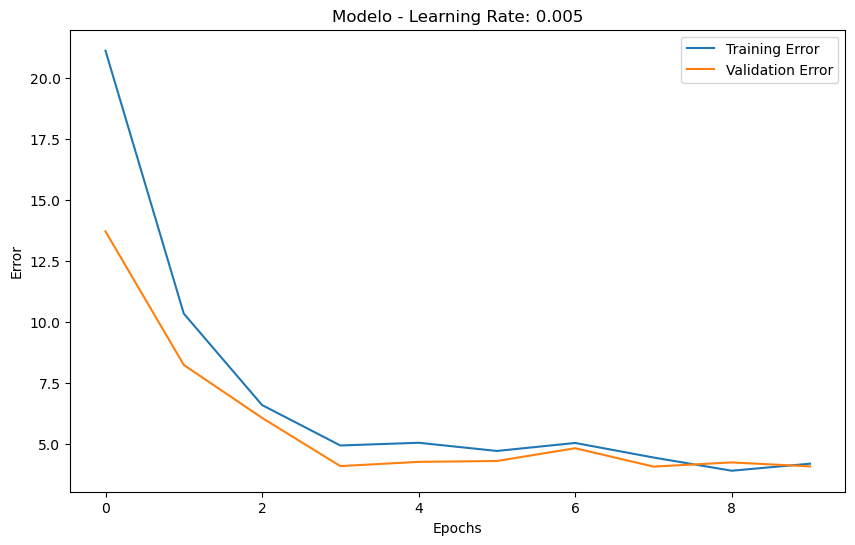

In [12]:
mejor_error = 99999
mejor_modelo = None
mejor_lr = None
mejor_resultado = None


for idx, history in enumerate(histories, start=1):
    train_loss = history.history['loss'][-1]
    train_error = history.history['mean_absolute_error'][-1]
    val_loss = history.history['val_loss'][-1]
    val_error= history.history['val_mean_absolute_error'][-1]

    print(f"\nModelo {idx}:")
    print("Learning rate:", models[idx-1].optimizer.learning_rate.numpy())
    print("Pérdida de Entrenamiento:", train_loss)
    print("Error de Etrenamiento:", train_error)
    print("Pérdida de Validación:", val_loss)
    print("Error de Validación:", val_error)
    
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['mean_absolute_error'], label='Training Error')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Modelo - Learning Rate: {str(models[idx-1].optimizer.learning_rate.numpy())}')
    plt.legend()
    plt.show()
    
    if train_error <= mejor_error:
        mejor_error = train_error
        mejor_lr = models[idx-1].optimizer.learning_rate.numpy()
        mejor_resultado = (train_loss, train_error)
        mejor_historial = history  # Guardar historial del mejor modelo
        mejor_modelo = models[idx-1]


Mejor Modelo:
Learning rate: 1e-04
Pérdida: 2.9959561824798584 Error: 2.9959561824798584


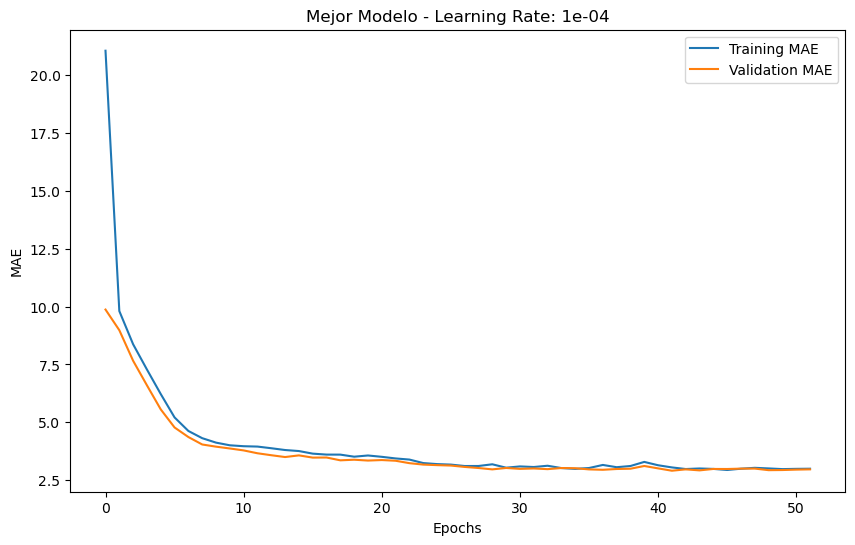

In [52]:
if mejor_historial:
    print("\nMejor Modelo:")
    print("Learning rate:", mejor_lr)
    print("Pérdida:", mejor_resultado[0], "Error:", mejor_resultado[1])
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(mejor_historial.history['mean_absolute_error'], label='Training MAE')
    plt.plot(mejor_historial.history['val_mean_absolute_error'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title(f'Mejor Modelo - Learning Rate: {str(mejor_lr)}')
    plt.legend()
    plt.show()
else:
    print("No se encontró ningún modelo con mejor precisión.")

In [34]:
num_prediccs = 25

# Realizar predicciones con el mejor modelo
predicciones = np.array(mejor_modelo.predict(x_test[:num_prediccs]))
val_real=np.array(y_test[:num_prediccs])

# val_real_normalized = (val_real - np.min(val_real)) / (np.max(val_real) - np.min(val_real))

for i in range(len(predicciones)):
    print(predicciones[i], val_real[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[11.620852 14.456102] [14.22 15.39]
[14.220635 16.33634 ] [12.93 15.83]
[31.114925 32.847054] [29.05 29.67]
[15.961712 17.678091] [14.66 15.64]
[14.038693 16.192196] [13.18 16.27]
[15.10045  17.008333] [16.69 19.76]
[36.481606 38.127377] [42.11 38.56]
[29.660824 31.369522] [26.84 30.17]
[14.136811 16.265757] [14.72 18.1 ]
[31.094326 32.807518] [33.13 32.25]
[30.048283 31.696518] [25.49 28.14]
[29.76902  31.456577] [28.64 28.95]
[13.157361 15.509264] [14.33 17.23]
[35.29941 36.25871] [36.86 37.28]
[15.9612055 17.676355 ] [14.6  15.14]
[36.37212  38.012974] [40.   36.26]
[23.35699  25.083216] [32.13 32.28]
[14.048223 16.194181] [15.23 18.14]
[15.9311   17.659458] [15.12 15.95]
[35.31328  36.265488] [33.28 34.11]
[15.007096 16.935764] [17.02 20.48]
[23.45951  25.183344] [29.4  32.93]
[11.613706 14.454614] [14.1  16.57]
[16.068258 17.770945] [12.85 14.37]
[35.26266  36.255455] [32.21 33.67]
